## Datan analysointi K2020_2 - Tehtävät kerta 7

Palauta Optiman palautuslaatikkoon viimeistään su 12.4. Kirjoita palautuslaatikon kommenttikenttään, mitkä tehtävät olet tehnyt kokonaan/osittain.

Opiskelijan nimi:

# 1. Asunnon hinta
Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht1.txt on (kuvitteellisia) asuntojen myyntihintoja ja niiden tietoja (pinta-ala, makuuhuoneiden lukumäärä ja saunan olemassaolo).

Tee **lineaarien regressiomalli**, jossa selittävinä muuttujina on pinta-ala, makuuhuoneiden lukumäärä ja saunan olemassaolo ja selitettävänä muuttujana myyntihinta. 

(Joudut muuttamaan sauna-kentän numeeriseksi)

Laske mallille selityskerroin.

Kokeile sitten mitä saat selityskertoimiksi, jos käytät selittävinä muuttuujina vain kahta kolmesta mahdollisesta.

Piirrä parhaasta mallista kaavio ennustetuista ja havaituista arvoista.

Tässä ei jaeta dataa opetus- ja testidataan.


Selityskerroin:  0.7442335552970589
Selityskerroin2:  0.7335822686603743
Selityskerroin3:  0.742057921659329
Selityskerroin4:  0.25426882030277387


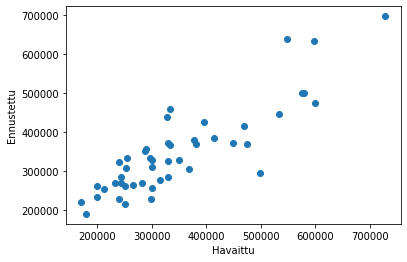

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht1.txt', sep=",", decimal='.')

df['s'] = 0
df.loc[(df['sauna']!='ei'), 's'] = 1
df['sauna']=df['s']
del df['s']
#print(df)

x = df[['ala','makuuhuoneita','sauna']]
y = df['hinta']

model = LinearRegression()
model.fit(x,y)
print("Selityskerroin: ", model.score(x,y))

x2 = df[['ala','makuuhuoneita']]
model.fit(x2,y)
print("Selityskerroin2: ", model.score(x2,y))
x3 = df[['ala','sauna']]
model.fit(x3,y)
print("Selityskerroin3: ", model.score(x3,y))
x4 = df[['makuuhuoneita','sauna']]
model.fit(x4,y)
print("Selityskerroin4: ", model.score(x4,y))

#---- PARAS----
model.fit(x,y)

forecast = model.predict(x)
plt.scatter(y, forecast)
plt.xlabel('Havaittu')
plt.ylabel('Ennustettu')
plt.show()

## 2. Ostaako

Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht2.txt on dataa henkilön tuloista, sukupuolesta ja siviilisäädystä. Lisäksi on tieto onko henkilö ostanut tuotteen vai ei.

Tee **päätöspuu** asetuksella max_depth=4, joka yrittää selittää ostamista muiden kenttien avulla. Testaa sitten mallia ja  tulosta `score` ja `confusion_matrix`.

Joudut muuttamaan joitain kenttiä numeerisiksi.


Tee päätöspuusta vuokaavio (dot-tiedosto), visualisoi se ja päättele manuaalisesti sen avulla miten puu luokittelisi seuraavat tiedot:
* tulot 60000, naimisissa, nainen
* tulot 30000, ei-naimisissa, mies

Kirjoita vastaukseen kommenttina päättelyketjut.

Tässä ei jaeta dataa opetus- ja testidataan.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht2.txt', sep=",", decimal='.')
df['sukupuoli']=df['sukupuoli'].map({'nainen': 0, 'mies': 1})
print(df)

x = df[['tulot','naimisissa','sukupuoli']]
y = df['ostaa']

# luodaan malli-olio
#model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model = DecisionTreeClassifier(max_depth=3)
# sovitetetaan, eli generoidaan päätöspuu
model.fit(x,y)

# ennustetaan tulokset
y_pred = model.predict(x)
# katsotaan tarkkuus
print("Accuracy:", model.score(x,y))
# Confusion Matrix
print(confusion_matrix(y, y_pred))


export_graphviz(decision_tree=model, out_file="tree_ostaako.dot",
                feature_names=x.columns, class_names=True, filled=True, rounded=True)

     ostaa  tulot  sukupuoli  naimisissa
0        0  24000          0           0
1        1  75000          0           1
2        0  46000          0           1
3        1  70000          1           1
4        0  43000          0           0
..     ...    ...        ...         ...
668      0  27000          0           0
669      0   3000          0           0
670      1  75000          0           1
671      1  51000          0           1
672      0  11000          1           1

[673 rows x 4 columns]
Accuracy: 0.9390787518573551
[[522  26]
 [ 15 110]]


#### Päätöspuu (decision tree)
![puu](https://student.labranet.jamk.fi/~M1475/public/dataanalytics/t2puu.png)

##### tulot 60000, naimisissa, nainen
- Onko tulot <= 57500? -> False
- Onko tulot <= 65500? -> True
- Onko ei-naimisissa? -> False
-> Ostaa

##### tulot 30000, ei-naimisissa, mies
- Onko tulot <= 57500? -> True
- Onko tulot <= 46500? -> True
- Onko tulot <= 34500? -> True
-> Ei osta

## 3. Jyväskylän kämpät
Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht5.txt on tietoja Jyväskylän toteutuneista kerrostaloasuntokaupoista  12 kk ajalta.

Jaa data opetusdataan (60%) ja testidataan (40%) ja tee opetusdatalla **lineaarinen regressiomalli** hinnan ennustamiseksi kentistä:
* m2
* rakennusvuosi
* hissi (muunna 0/1)
* kunto (muunna numeeriseksi)
* tee uusi kenttä onkoKeskustassa, joka saa arvon 1, jos kaupunginosa = Keskusta

Tsekkaa onko datassa puuttuvia arvoja ja korvaa ne ko. kentän mediaanilla. 

Testaa saatua mallia testidatalla.  
Piirrä hajontakaavioon ennusteen antamat arvot vs toteutuneet arvot.

Puuttuvien arvojen lukumäärä per muuttuja (3):
kaupunginosa     0
huoneisto        2
m2               0
hinta            0
rakennusvuosi    0
hissi            0
kunto            0
keskusta         0
dtype: int64
(307, 5)
(206, 5)
Testausdatan selityskerroin: 0.6659397877624792


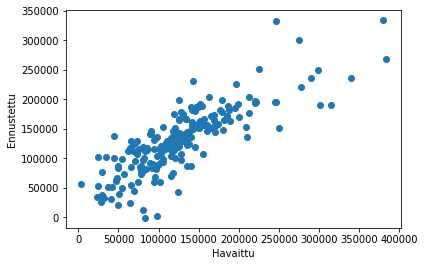

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht5.txt', sep=",", decimal='.')

#print("Puuttuvien arvojen lukumäärä per muuttuja (1):\n%s" % df.isnull().sum())
df['hissi']=df['hissi'].map({'ei': 0, 'on': 1})
df['kunto']=df['kunto'].map({'huono': 0, 'tyyd.': 1, 'hyvä': 0})
df['keskusta'] = 0
df.loc[(df['kaupunginosa']=='Keskusta'), 'keskusta'] = 1
#print("Puuttuvien arvojen lukumäärä per muuttuja (2):\n%s" % df.isnull().sum())

median_kunto = df["kunto"].median()
df["kunto"].fillna(median_kunto, inplace=True)
print("Puuttuvien arvojen lukumäärä per muuttuja (3):\n%s" % df.isnull().sum())
#print(df)

x = df[['m2','rakennusvuosi','hissi','kunto','keskusta']]
y = df['hinta']

# jaotellaan testi- / opetusdata
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.4, random_state = 31)
print(xTrain.shape)
print(xTest.shape)

# luodaan malli-olio opetusdatalla
model = LinearRegression()
model.fit(xTrain,yTrain)

# Testaus testidatalla
print("Testausdatan selityskerroin:", model.score(xTest,yTest))

forecast = model.predict(xTest)
plt.scatter(yTest, forecast)
plt.xlabel('Havaittu')
plt.ylabel('Ennustettu')
plt.show()

## 4. Koripallo

Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/nba_logreg.csv on 1340 NBA-pelaajan tilastoja heidän tulokaskaudeltaan. 

[kenttien selitys (eng)](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/nba.png)

Viimeinen sarake kertoo onko pelaaja sittemmin pelannut NBA:ssa yli 5 kautta. Kokeile kuinka hyvin **logistinen regressio** pystyy ennustamaan tämän muiden kentttien (pl. pelaajan nimi) avulla. Korvaa tarvittaessa puuttuvat arvot ko. kentän mediaanilla. Tulosta score ja confusion matrix.


Tee sitten sama kokeilu **päätöspuun** avulla. Tulosta tästä myös kuinka paljon eri kentät vaikuttavat mallin mukaan ennustettavaan muuttujaan.

Tässä ei tarvitse jakaa aineistoa opetus- ja testidataan.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/nba_logreg.csv', sep=",", decimal='.')

#print(df)
#print("Puuttuvien arvojen lukumäärä per muuttuja (1):\n%s" % df.isnull().sum())
# korvataan puuttuvat 3P% mediaanilla
median_3P = df["3P%"].median()
df["3P%"].fillna(median_3P, inplace=True)
#print("Puuttuvien arvojen lukumäärä per muuttuja (2):\n%s" % df.isnull().sum())
#print(df)
#print(df.iloc[:, 1:21])

#x = df.iloc[:, 1:20] # 0.716
#x = df.iloc[:, np.r_[2:20]] # 0.692
#x = df.iloc[:, 1:19] # 0.717
#x = df.iloc[:, np.r_[1:17, 19]] # 0.722
#x = df.iloc[:, np.r_[1,2,3,5,6,7,8,9,10,11,13,16,17,19]] # 0.722

x = df.iloc[:, 1:20]
y = df['TARGET_5Yrs']

scaler = StandardScaler()
xScaled = scaler.fit_transform(x)

# luodaan logistinen regreassio malli
model = LogisticRegression()
model.fit(xScaled,y)

# ennustetaan tulokset
y_pred = model.predict(xScaled)
# katsotaan tarkkuus
print("Accuracy:", model.score(xScaled,y))
# Confusion Matrix
print(confusion_matrix(y, y_pred))


# luodaan päätöspuu malli
model2 = DecisionTreeClassifier()
# sovitetetaan, eli generoidaan päätöspuu
model2.fit(x,y)

# ennustetaan tulokset
y_pred2 = model2.predict(x)
# katsotaan tarkkuus
print("Accuracy 2:", model2.score(x,y))
# Confusion Matrix
print(confusion_matrix(y, y_pred2))

#print(model.predict_proba(x))

# kenttien vaikutus dataan
print(df.corrwith(y))

Accuracy: 0.7164179104477612
[[266 243]
 [137 694]]
Accuracy 2: 0.9850746268656716
[[506   3]
 [ 17 814]]
GP             0.396833
MIN            0.317805
PTS            0.315981
FGM            0.317594
FGA            0.292660
FG%            0.227134
3P Made        0.036619
3PA            0.018110
3P%           -0.003937
FTM            0.296841
FTA            0.296089
FT%            0.106706
OREB           0.293307
DREB           0.284677
REB            0.299406
AST            0.175353
STL            0.229811
BLK            0.210114
TOV            0.272348
TARGET_5Yrs    1.000000
dtype: float64


P:\Programs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 5. Sienet
Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/mushrooms.csv on tietoja sienistä (kenttien selitykset [englanniksi](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/mushrooms.txt)).

Pyri ennustamaan kentän _class_ arvoa muiden kenttien avulla **päätöspuulla**. 
Kentät ovat luokkamuotoisia, tyyliin 
>gill-attachment: attached=a,descending=d,free=f,notched=n

Tee siis ensin (selittävistä) kentistä dummy-kentät pandasin get_dummies-funktiolla, voit tehdä sen kerralla kaikille sarakkeille.

Jaa data opetusdataan ja testidataan 60/40%. 

Kokeile päätöspuulle max_depth-arvoja 2, 3, 4 ja 5 ja printtaa niiden antamat scoret ja confusion_matrixit.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/mushrooms.csv', sep=",", decimal='.')

#print(df)
#print("Puuttuvien arvojen lukumäärä per muuttuja (1):\n%s" % df.isnull().sum())
df2 = df.apply(LabelEncoder().fit_transform)
#print(df2)
#print(df2.iloc[:, 1:23])
x = df2.iloc[:, 1:23]
y = df['class']

# Ei tarvita - Skaalataan, jotta kaikki yhtä painavia
#scaler = StandardScaler()
#x = scaler.fit_transform(x)

# jaotellaan testi- / opetusdata
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.4, random_state = 31)
#print(xTrain.shape)
#print(xTest.shape)


# luodaan päätöspuu malli
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model4 = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model5 = DecisionTreeClassifier(criterion='entropy', max_depth=5)


# sovitetetaan, eli generoidaan päätöspuu
model2.fit(xTrain,yTrain)
model3.fit(xTrain,yTrain)
model4.fit(xTrain,yTrain)
model5.fit(xTrain,yTrain)


print("\nmax depth 2:")
print("Selityskerroin:", model2.score(xTest,yTest))
print(confusion_matrix(y, model2.predict(x)))

print("\nmax depth 3:")
print("Selityskerroin:", model3.score(xTest,yTest))
print(confusion_matrix(y, model3.predict(x)))

print("\nmax depth 4:")
print("Selityskerroin:", model4.score(xTest,yTest))
print(confusion_matrix(y, model4.predict(x)))

print("\nmax depth 5:")
print("Selityskerroin:", model5.score(xTest,yTest))
print(confusion_matrix(y, model5.predict(x)))



max depth 2:
Selityskerroin: 0.9138461538461539
[[4112   96]
 [ 604 3312]]

max depth 3:
Selityskerroin: 0.952
[[3968  240]
 [ 108 3808]]

max depth 4:
Selityskerroin: 0.952
[[3968  240]
 [ 108 3808]]

max depth 5:
Selityskerroin: 0.9796923076923076
[[4112   96]
 [  48 3868]]
